In [1]:
import sympy as sym
import sympy.physics.mechanics as me
from sympy.abc import t
import moyra as ma
me.mechanics_printing()

In [2]:
DoFs = 3

# heave and fold angle as degrres of freedom
p = ma.DynamicModelParameters(DoFs)
p.DoFs  = ma.ModelSymbol(value = DoFs,string = 'DoFs')
#gravity vector
p.g  = ma.ModelSymbol(value = 9.81,string = 'g')                     # gravity
p.g_v = ma.ModelMatrix(value =[0,0,-1],length=3,string='g_v') # The stationary point

In [3]:
# inner wing properites
p.l_ac = ma.ModelSymbol(value = 0.3,string = 'l_ac')
p.l_htp = ma.ModelSymbol(value = 0.3,string = 'l_htp')
p.H = ma.ModelMatrix(value = [1]*3,length=3,string='H')
p.P = ma.ModelMatrix(value = [1]*3,length=3,string='P')
p.Lambda = ma.ModelSymbol(value = 0.3,string = 'Lambda')
p.m_ac = ma.ModelSymbol(value = 0.3,string = 'm_ac')
p.m_wt = ma.ModelSymbol(value = 0.3,string = 'm_wt')

p.I_xxwt = ma.ModelSymbol(value = 0.3,string = 'I_xxwt')
# p.I_xx = ma.ModelSymbol(value = 0.3,string = 'I_{xx}')
p.I_yy = ma.ModelSymbol(value = 0.3,string = 'I_yy')

p.y_0,p.x_0,p.z_0,p.F_z,p.M_y = sym.symbols('y_0,x_0,z_0,F_z,M_y')

In [4]:
ac_frame = ma.frames.HomogenousFrame().R_y(p.q[2]).Translate(0,0,p.q[1])
wing_aero_frame = ac_frame.Translate(p.x_0,p.y_0,p.z_0)

# starboard_hinge_frame = ac_frame.Translate(*p.H)
# starboard_wt_frame = starboard_hinge_frame.R_x(p.q[4]).Translate(p.x_0,p.y_0,p.z_0)
# starboard_wt_com_frame = starboard_hinge_frame.R_x(p.q[4]).Translate(*p.P)

# port_hinge_frame = ac_frame.Translate(p.H[0],-p.H[1],p.H[2])
# port_wt_frame = port_hinge_frame.R_x(p.q[3]).Translate(p.x_0,p.y_0,p.z_0)
# port_wt_com_frame = port_hinge_frame.R_x(p.q[3]).Translate(p.P[0],-p.P[1],p.P[2])

starboard_hinge_frame = ac_frame.Translate(*p.H)
starboard_wt_frame = starboard_hinge_frame.R_z(p.Lambda).R_x(p.q[0]).R_z(-p.Lambda).Translate(p.x_0,p.y_0,p.z_0)
starboard_wt_com_frame = starboard_hinge_frame.R_z(p.Lambda).R_x(p.q[0]).R_z(-p.Lambda).Translate(*p.P)

port_hinge_frame = ac_frame.Translate(p.H[0],-p.H[1],p.H[2])
port_wt_frame = port_hinge_frame.R_x(0).Translate(p.x_0,p.y_0,p.z_0)
port_wt_com_frame = port_hinge_frame.R_x(0).Translate(p.P[0],-p.P[1],p.P[2])

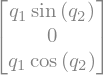

In [5]:
ac_frame.transform_point([0,0,0])

In [6]:
M = ma.elements.MassMatrix(p.m_wt,0,0,0,0,0,0)
port_fwt_ele = ma.elements.RigidElement(p.q,port_wt_com_frame,M,grav_vec =  p.g*p.g_v)
starboard_fwt_ele = ma.elements.RigidElement(p.q,starboard_wt_com_frame,M,grav_vec =  p.g*p.g_v,simplify = False)

M = ma.elements.MassMatrix(p.m_ac,0,p.I_yy,0,0,0,0)
ac_ele = ma.elements.RigidElement(p.q,ac_frame,M,grav_vec = p.g*p.g_v)

In [7]:
starboard_fwt_ele.simplify

False

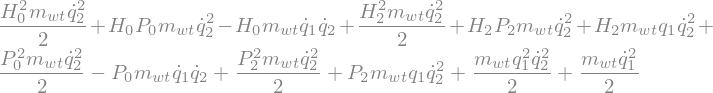

In [8]:
port_fwt_ele.ke

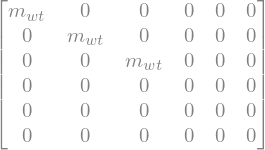

In [9]:
starboard_fwt_ele.M_e

In [10]:
tt = starboard_wt_com_frame.InvAdjoint()*starboard_wt_com_frame.ManipJacobian(p.q)
M = tt.T*starboard_fwt_ele.M_e*tt
ke = sym.Rational(1,2)*p.qd.T*M*p.qd

In [11]:
M = starboard_fwt_ele.M

In [12]:
a = starboard_fwt_ele.ke

In [13]:
sm = ma.SymbolicModel.FromElementsAndForces_2(p.q,[ac_ele,starboard_fwt_ele,port_fwt_ele])

Generating EoM for Element 1 out of 3 - default:RigidElement
Generating EoM for Element 2 out of 3 - default:RigidElement
Generating EoM for Element 3 out of 3 - default:RigidElement


In [14]:
funcs = []
# funcs.append(('get_main_wing_aero_force',sym.simplify(wing_aero_frame.BodyJacobian(p.q)).T*sym.Matrix([0,0,p.F_z,0,p.M_y,0])))
# funcs.append(('get_port_wt_aero_force',sym.simplify(port_wt_frame.BodyJacobian(p.q)).T*sym.Matrix([0,0,p.F_z,0,p.M_y,0])))
# funcs.append(('get_starboard_wt_aero_force',sym.simplify(starboard_wt_frame.BodyJacobian(p.q)).T*sym.Matrix([0,0,p.F_z,0,p.M_y,0])))
# funcs.append(('get_main_body_vel',sym.simplify(wing_aero_frame.transform_point([0,0,0]).diff(t))))
# funcs.append(('get_port_wt_body_vel',sym.simplify(port_wt_frame.transform_point([0,0,0]).diff(t))))
# funcs.append(('get_starboard_wt_body_vel',sym.simplify(starboard_wt_frame.transform_point([0,0,0]).diff(t))))

In [16]:
%timeit -r 1 -n 1
base_dir = "C:\\Users\\qe19391\\OneDrive - University of Bristol\\Documents\\MATLAB\\Duncan_code_22022022\\Duncan_EOM\\Calculations\\FH_test\\"
class_name = "DuncanModelBaseline"
base_class = ""
sm.to_matlab_class(p,base_dir,class_name,base_class, additional_funcs=funcs, octave_user_functions=[])

In [4]:
theta = sym.symbols('theta')
Lambda = sym.symbols('Lambda')
K = sym.Matrix([sym.cos(Lambda),sym.sin(Lambda),0])

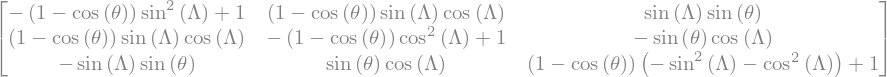

In [8]:
Rod = ma.frames.HomogenousFrame().R_rodriguez(K,theta).A
Rod

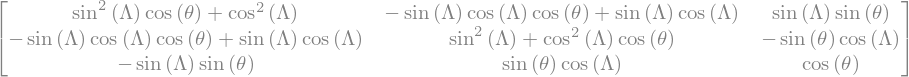

In [9]:
Rot = ma.frames.HomogenousFrame().R_z(Lambda).R_x(theta).R_z(-Lambda).A
Rot

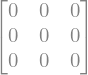

In [10]:
sym.simplify(Rod-Rot)